In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [7]:
url = 'https://raw.githubusercontent.com/filipelauar/projects/main/dimensionality%20reduction%20and%20clustering/data.csv'

data = pd.read_csv(url)
data.head(5)

,X76,X95,X52,X36,X74,X69,X23,X27,X19,X39,X26,X63,X21,X75,X81,X29,X73,X22,X77,X15,X90,X72,X53,X11,X99,X32,X80,X9,X17,X7,X59,X71,X82,X57,X4,X46,X14,X62,X18,X0,...,X42,X49,X85,X93,X50,X55,X91,X60,X64,X97,X92,X79,X65,X83,X3,X34,X48,X1,X78,X41,X40,X31,X5,X88,X70,X24,X25,X47,X51,X94,X45,X67,X16,X37,X56,X35,X87,X89,X96,Y
0,-0.208298,0.793446,-0.200865,-0.005766,-0.336092,0.037238,0.148319,-1.423624,-0.411594,0.541975,-0.020277,0.437477,-0.389835,0.391460,-0.846674,0.460352,-0.633823,-0.391758,-0.634470,0.387279,-0.888438,-1.335531,-0.177870,396.90,0.404514,-0.511893,0.961832,296.0,-0.215879,4.0900,0.369872,0.311970,-0.020545,-0.017683,0.538,-0.444553,-0.068584,-0.861241,1.350954,0.00632,...,-0.851374,-0.122590,0.757609,0.504079,-0.746311,0.679089,0.736453,-0.081412,-0.967994,0.281151,0.027053,0.747144,0.425516,-0.128350,0.0,-0.646167,-0.771295,18.0,0.986413,0.375189,-0.603747,-0.865163,6.575,-0.721879,-1.935117,-0.675288,0.327522,-0.374340,-0.404917,0.497355,-0.216825,0.552672,0.499400,0.134669,-1.639742,-0.004640,-0.635006,-0.758949,0.488324,24.0
1,-0.221028,-0.363311,-0.631604,1.152664,-0.532182,1.176513,-0.100142,1.170051,0.360931,0.593115,-0.302894,-0.356989,0.013888,-0.720520,0.678514,-0.488745,-0.738167,0.568110,0.070323,0.589095,-0.889363,-0.883889,0.470315,396.90,-0.665818,1.148572,-0.477435,242.0,-0.385601,4.9671,-0.269198,0.283905,0.578165,0.420716,0.469,0.982535,-0.507044,0.949271,0.453492,0.02731,...,0.199172,-0.417903,0.143350,-0.593053,-1.344712,0.490217,0.114765,-0.673883,0.529479,-0.851641,0.144977,-0.014412,-0.152128,-0.022604,0.0,-0.999404,0.479888,0.0,-0.322782,0.673517,-0.573768,-0.550144,6.421,0.054565,0.238267,0.300002,-0.479300,-0.598801,-0.549221,0.288017,0.571930,-0.186832,-0.238081,1.404931,0.489104,0.248675,0.361039,0.435418,-1.324025,21.6
2,-1.059124,-0.777557,-0.172609,0.767116,0.141027,0.677921,0.820292,-0.255193,0.691621,0.254366,1.402484,-0.483251,0.196233,1.265441,-1.045091,0.412399,-0.362024,-1.254377,-0.590341,-0.515107,-0.157953,0.601750,-0.526931,392.83,0.582053,0.312238,-1.038350,242.0,0.052678,4.9671,0.475248,0.477213,0.893404,-0.515474,0.469,0.432860,-1.235119,-0.794102,0.033644,0.02729,...,0.790987,1.218550,-0.138927,0.069059,0.644169,0.427483,0.599266,-1.879127,0.321907,-0.402176,-0.072416,0.401436,0.752701,0.704030,0.0,-0.274228,-1.326888,0.0,-0.861805,0.273289,1.098014,-0.149917,7.185,-0.684918,0.115759,-1.268873,0.395109,0.995201,-0.097276,1.116898,-0.643929,-0.543850,-0.478493,-0.386637,0.175114,-0.658092,-0.338583,-0.177981,-0.050339,34.7
3,1.133450,-0.790638,-0.586627,0.942378,0.283674,-0.577118,-0.145977,-0.263209,1.435926,-0.750034,-0.337699,0.265731,0.545291,-0.239160,-0.569415,1.117055,0.908942,-0.371971,-0.336068,-1.155262,1.537918,-0.556444,0.496334,394.63,2.165275,-0.385565,0.444702,222.0,-0.144497,6.0622,0.465442,-0.334565,0.387232,1.340462,0.458,0.967448,-0.609817,0.483075,0.916136,0.03237,...,0.735794,0.297430,-1.102115,-0.292788,0.405189,0.660326,0.272483,-0.264169,0.071470,-0.639965,-0.440053,1.252019,-1.318576,-0.629825,0.0,0.321559,0.494788,0.0,0.471024,-0.546632,-1.446395,-0.401630,6.998,0.312475,0.308922,-1.051889,0.117846,0.553223,0.655184,0.071060,0.719154,0.056236,-0.495367,0.204324,-1.078683,0.640999,-0.921276,-0.602238,0.421393,33.4
4,0.908181,-0.913293,0.362265,-0.437131,0.514517,-1.625222,1.019997,-0.422887,0.140903,-0.073760,0.542688,0.453169,-0.680793,-0.416296,-0.324693,-0.011757,-0.242484,-0.757615,0.119522,0.523815,-1.699809,1.670456,0.080154,396.90,-0.042503,0.417020,0.298950,222.0,0.173176,6.0622,-0.462416,-0.337170,-0.121813,1.953074,0.458,0.120273,-0.079873,-0.275706,0.296532,0.06905,...,0.356367,0.420408,-0.392782,1.371883,0.413778,0.058106,0.692957,-0.291473,0.377167,0.287399,-0.077956,0.114590,-0.316093,-0.636330,0.0,0.435896,-0.207705,0.0,-0.196080,0.006470,0.821536,0.252967,7.147,0.812812,-0.478507,0.292284,-1.376212,-0.125352,1.142569,0.188138,1.026587,-0.230706,0.151710,-0.638937,0.072631,-0.517829,-1.028707,0.465484,0.351005,36.2


## 1

In [8]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

Metrics

In [10]:
def det_coef(y_true, y_pred):
    Y_true_mean = y_true.mean()
    R2 = 1 - np.sum((y_true - y_pred)**2)/np.sum((y_true - Y_true_mean)**2)
    return R2


def mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

Simple Linear Regression.

In [11]:
model = LinearRegression().fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

coef = det_coef(y_test.values, y_pred)
err = mse(y_test.values, y_pred)

In [12]:
print("The determination coeficient is: " + str(coef))
print("The mean squared error is: " + str(err))

The determination coeficient is: 0.5384852478771169
The mean squared error is: 37.70530085856642


SVD is another name for PCA. Here we decrease the dimensionality and then apply the Linear Regression. You can choose the number of variable by changing the "n_components" variable.

In [13]:
def apply_svd(data, n_component):
    cov = np.cov(data.T)
    U, s, V = np.linalg.svd(cov)
    
    return U[:, :n_component]

In [14]:
X_train_svd = X_train_scaler@apply_svd(X_train_scaler, 2)

In [15]:
X_test_svd = X_test_scaler@apply_svd(X_test_scaler, 2)

In [16]:
model = LinearRegression().fit(X_train_svd, y_train)
y_pred = model.predict(X_test_svd)

coef = det_coef(y_test, y_pred)
err = mse(y_test.values, y_pred)

In [17]:
print("The determination coeficient is: " + str(coef))
print("The mean squared error is: " + str(err))

The determination coeficient is: 0.22807907821426943
The mean squared error is: 63.06517930591142


Implementation of the forward selection methods using the t statistic.

In [18]:
from scipy.stats import norm

#I implemented the method once with the parameter early_stoping to use or not the pvalues as a early stoping condition.

def forward_selection(X, y, early_stoping=False):
    idx_chosen_cols = []
    idx_unchosen_cols = list(range(X.shape[1]))
    n = X.shape[0]
    pvals = []
    
    r = y.values.copy()
    
    while idx_unchosen_cols != []:
        best_pval = 0
        best_t = -1
        preds = 0
        index = -1
        
        for idx in idx_unchosen_cols:
            
            x = X[:, [idx]]
            
            model = LinearRegression(fit_intercept=True).fit(x, r)
            y_pred = model.predict(x)
            
            gramm = 1/n * x.T @ x
            sigma = 1/(n-2) * n*mse(r, y_pred)
            gramm_inv = np.linalg.inv(gramm)
            sn = gramm_inv[0, 0]
            
            T = np.sqrt(n) * np.abs(model.coef_) / (np.sqrt(sigma * sn))
            pval = 2*(1 - norm.cdf(T))
            
            if T > best_t:
                if (early_stoping and pval < .05) or not early_stoping:
                    best_t = T
                    best_pval = pval
                    preds = y_pred
                    index = idx
                    
        if best_t == -1:
            break
            
        idx_chosen_cols.append(index)
        
        r = r - preds
        idx_unchosen_cols.remove(index)
        
        pvals.append(best_pval)
        
    return idx_chosen_cols, pvals

In [19]:
index, pvals = forward_selection(X_train_scaler, y_train, early_stoping=False)

In [20]:
print("The order of the variables is: \n\n" + str(data.columns[index]))

The order of the variables is: 

Index(['X12', 'X10', 'X7', 'X5', 'X49', 'X17', 'X39', 'X53', 'X57', 'X3',
       'X99', 'X55', 'X29', 'X85', 'X90', 'X26', 'X34', 'X87', 'X74', 'X4',
       'X6', 'X47', 'X28', 'X44', 'X32', 'X77', 'X13', 'X94', 'X54', 'X45',
       'X73', 'X96', 'X69', 'X31', 'X71', 'X1', 'X22', 'X67', 'X14', 'X38',
       'X18', 'X20', 'X72', 'X48', 'X65', 'X24', 'X23', 'X19', 'X68', 'X36',
       'X37', 'X51', 'X42', 'X63', 'X27', 'X35', 'X56', 'X84', 'X98', 'X30',
       'X8', 'X9', 'X2', 'X25', 'X43', 'X16', 'X33', 'X86', 'X91', 'X52', 'X0',
       'X64', 'X15', 'X97', 'X81', 'X60', 'X58', 'X89', 'X82', 'X80', 'X40',
       'X62', 'X78', 'X66', 'X76', 'X95', 'X70', 'X93', 'X21', 'X61', 'X59',
       'X92', 'X83', 'X88', 'X41', 'X11', 'X46', 'X50', 'X75', 'X79'],
      dtype='object')


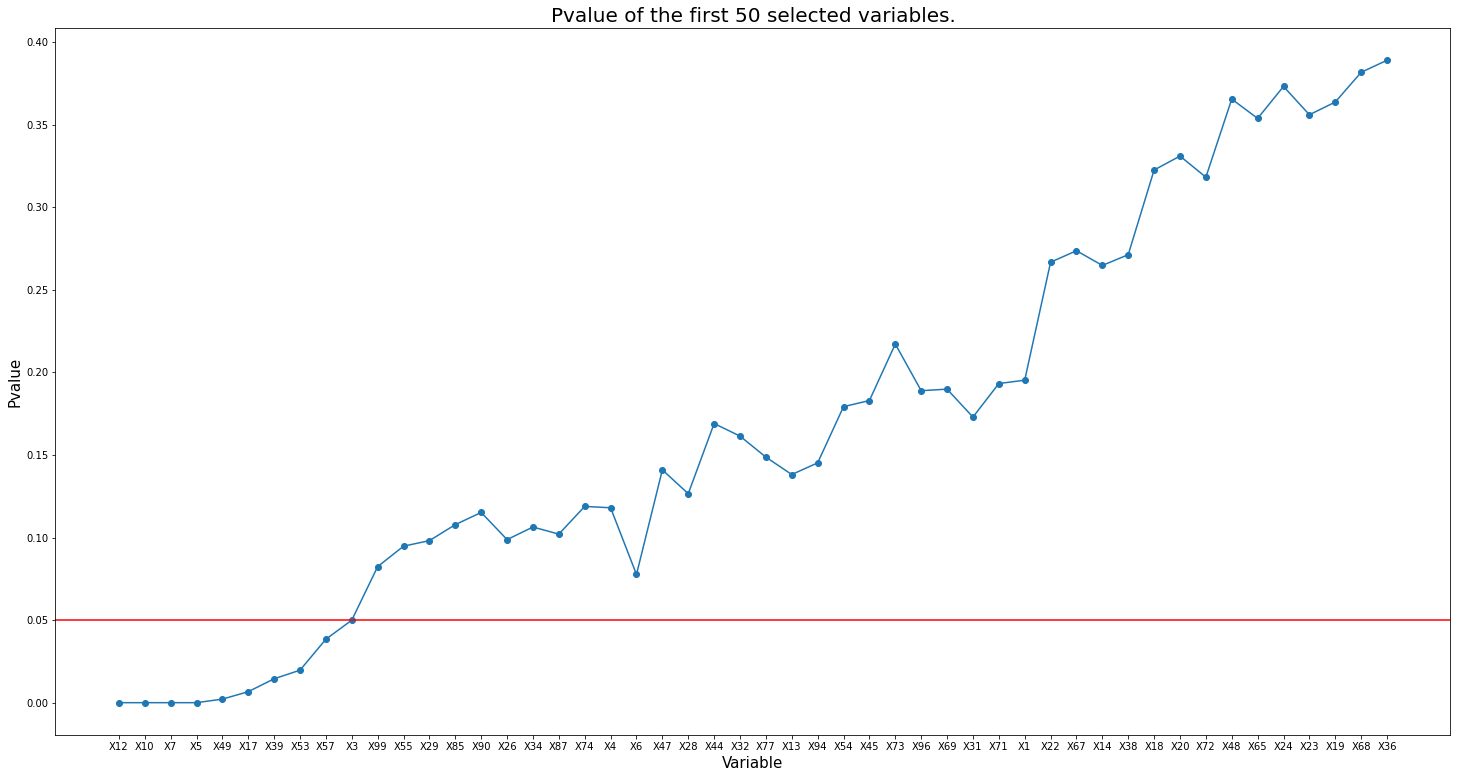

In [22]:
plt.figure(figsize=(25, 13))
plt.scatter(data.columns[index[:50]], pvals[:50])
plt.plot(data.columns[index[:50]], pvals[:50])
plt.axhline(0.05, color="red")
plt.ylabel("Pvalue", fontsize=15)
plt.xlabel("Variable", fontsize=15)
plt.title("Pvalue of the first 50 selected variables.", fontsize=20)
plt.show()

In [23]:
def plot_t_graphs(X, y):
    
    idx_chosen_cols = []
    idx_unchosen_cols = list(range(X.shape[1]))
    n = X.shape[0]
    pvals = []
    
    t_stat = np.zeros((100, 3))
    
    r = y.values.copy()
    
    for i in range(3):
        
        best_t = -1
        preds = 0
        index = -1
        
        for idx in idx_unchosen_cols:
            
            x = X[:, [idx]]
            
            model = LinearRegression(fit_intercept=True).fit(x, r)
            y_pred = model.predict(x)
            
            gramm = 1/n * x.T @ x
            sigma = 1/(n-2) * n*mse(r, y_pred)
            gramm_inv = np.linalg.inv(gramm)
            sn = gramm_inv[0, 0]
            
            T = np.sqrt(n) * np.abs(model.coef_) / (np.sqrt(sigma * sn))
            
            t_stat[idx, i] = T
            
            if T > best_t:
                best_t = T
                preds = y_pred
                index = idx
            
        idx_chosen_cols.append(index)
        
        r = r - preds
        idx_unchosen_cols.remove(index)
        
    return t_stat

In [24]:
t_stats = plot_t_graphs(X_train_scaler, y_train)

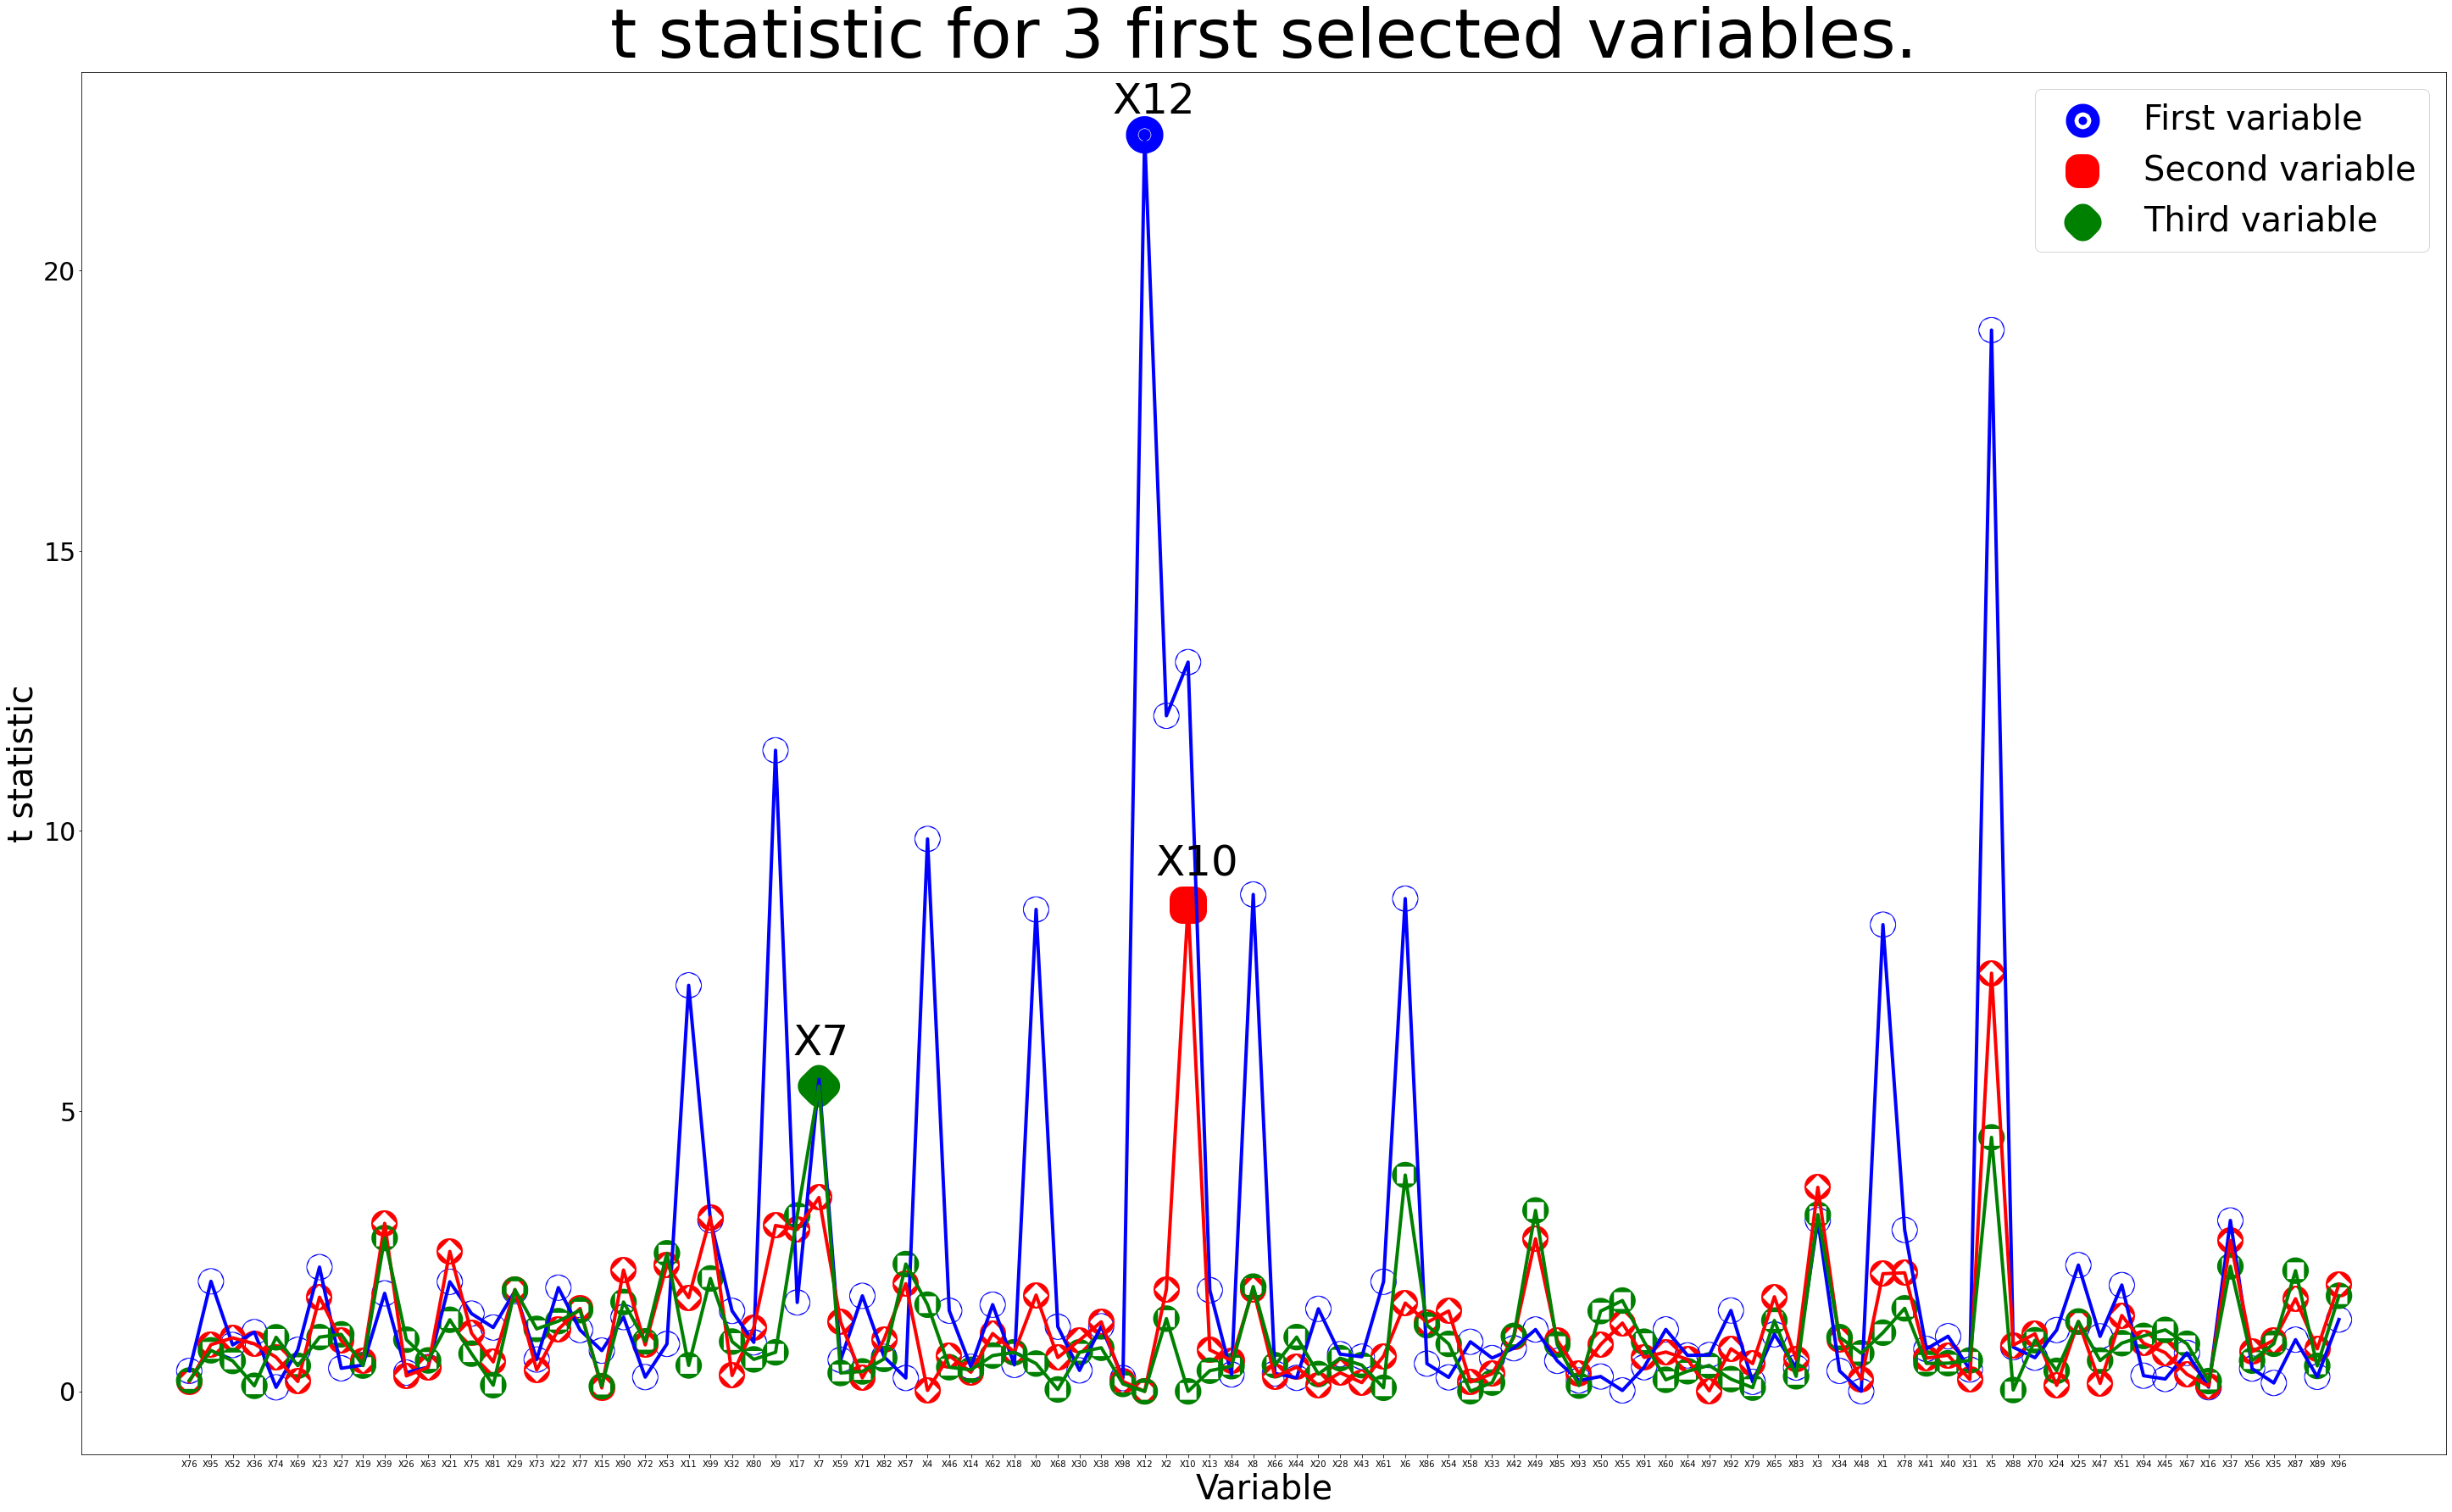

In [25]:
plt.rcParams['ytick.labelsize'] = 30
col = ['blue', 'red', 'green']
marker = ['o', 's', 'D']

plt.figure(figsize=(50, 30))

for i in range(3):
    s = np.ones(100)
    s[np.argmax(t_stats[:, i])] = 200

    plt.scatter(data.columns[:-1], t_stats[:, i], linewidths=30, s=s, color=col[i], marker=marker[i])
    
plt.legend(("First variable", "Second variable", "Third variable"), fontsize=40)

for i in range(3):
    plt.plot(data.columns[:-1], t_stats[:, i], color=col[i], linewidth=4)

plt.text(42.5, 22.8, "X12", fontsize=50)
plt.text(27.8, 6, "X7", fontsize=50)
plt.text(44.5, 9.2, "X10", fontsize=50)

plt.ylabel("t statistic", fontsize=40)
plt.xlabel("Variable", fontsize=40)
plt.title("t statistic for 3 first selected variables.", fontsize=80)
plt.show()

The graph above show the t statistics graphs for the three first variables chosen from the forward selectio algorithm. The blue lines and circle points corresponds to the first variable, the red lines and square points for the second and the green lines and diamond points for the third. The filled point with label is the variable with bigger t statistic for the iteration of the forward selection. I tried to increase the size of the labels on the x-axis but as there are too many variables, I could not make them visible. 

It's interesting to see that the second bigger t statistic for the first variable (on the right) is not the bigger for the second or third one. 

In [26]:
index, pvals = forward_selection(X_train_scaler, y_train, True)

In [27]:
print("The order of the variables is: \n\n" + str(data.columns[index]))

The order of the variables is: 

Index(['X12', 'X10', 'X7', 'X5', 'X49', 'X17', 'X39', 'X53', 'X57', 'X3'], dtype='object')


Applying the Linear Regression after applying the forward variable selection method.

In [29]:
X_train_scaler_FVS = X_train_scaler[:, index]
X_test_scaler_FVS = X_test_scaler[:, index]

model = LinearRegression(fit_intercept=True).fit(X_train_scaler_FVS, y_train)
y_pred = model.predict(X_test_scaler_FVS)

coef = det_coef(y_test, y_pred)
err = mse(y_test.values, y_pred)

In [30]:
print("The determination coeficient is: " + str(coef))
print("The mean squared error is: " + str(err))

The determination coeficient is: 0.5497008276198485
The mean squared error is: 36.78899903601852
